11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 - 3s - 8ms/step - accuracy: 0.8910 - loss: 0.3838 - val_accuracy: 0.9397 - val_loss: 0.2025
Epoch 2/10
375/375 - 2s - 4ms/step - accuracy: 0.9545 - loss: 0.1579 - val_accuracy: 0.9609 - val_loss: 0.1391
Epoch 3/10
375/375 - 3s - 7ms/step - accuracy: 0.9676 - loss: 0.1099 - val_accuracy: 0.9646 - val_loss: 0.1202
Epoch 4/10
375/375 - 2s - 4ms/step - accuracy: 0.9759 - loss: 0.0822 - val_accuracy: 0.9664 - val_loss: 0.1175
Epoch 5/10
375/375 - 3s - 7ms/step - accuracy: 0.9810 - loss: 0.0639 - val_accuracy: 0.9712 - val_loss: 0.0964
Epoch 6/10
375/375 - 2s - 4ms/step - accuracy: 0.9853 - loss: 0.0507 - val_accuracy: 0.9716 - val_loss: 0.0953
Epoch 7/10
375/375 - 2s - 4ms/step - accuracy: 0.9875 - loss: 0.0411 - val_accuracy: 0.9744 - val_loss: 0.0912
Epoch 8/10
375/375 - 2s - 4ms/step - accuracy: 0.9904 - loss: 0.0329 - val_accuracy: 0.9726 - val_loss: 0.0941
Epoch 9/10
375/375 - 3s - 7ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9716 - val_loss: 0.1039
E

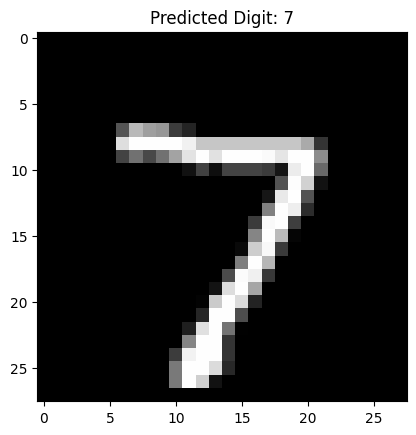

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images (0–255 → 0–1)
x_train = x_train.reshape((60000, 784)).astype('float32') / 255.0
x_test  = x_test.reshape((10000, 784)).astype('float32') / 255.0

# One-hot encode labels (0–9)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\n✅ Test Accuracy:", round(test_acc*100, 2), "%")

import numpy as np

predictions = model.predict(x_test)
sample = 0  # Change index to test different samples
plt.imshow(x_test[sample].reshape(28,28), cmap='gray')
plt.title("Predicted Digit: {}".format(np.argmax(predictions[sample])))
plt.show()
